<figure style="text-align: center;">
  <img src="_static/intro/title_page.png" style="display: block; margin: 0 auto; width: 100%;">
</figure>

### Univariate Statistics

Michael J. Pyrcz, Professor, The University of Texas at Austin 

[Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://[Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

Chapter of e-book "Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy". 

```{admonition} Cite this e-Book as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy, https://geostatsguy.github.io/GeostatsPyDemos_Book.  
```

The workflows in this book and more are available here:

```{admonition} Cite the GeostatsPyDemos GitHub Repository as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, GeostatsPyDemos: GeostatsPy Python Package for Spatial Data Analytics and Geostatistics Demonstration Workflows Repository (0.0.1). Zenodo. https://zenodo.org/doi/10.5281/zenodo.12667035

[![DOI](https://zenodo.org/badge/777871341.svg)](https://zenodo.org/doi/10.5281/zenodo.12667035)

```

By Michael J. Pyrcz <br />
&copy; Copyright 2024.

This chapter is a tutorial for / demonstration of **Univariate Statistics**. 

**YouTube Lecture**: check out my lecture on [Univariate Statistics](https://youtu.be/wAcbA2cIqec?si=4Pd5nqNbOUrBqIAO). For your convenience here's a summary of salient points.

Here's a demonstration of calculation of univariate statistics in Python. This demonstration is part of the resources that I include for my courses in Spatial / Subsurface Data Analytics and Geostatistics at the Cockrell School of Engineering and Jackson School of Goesciences at the University of Texas at Austin.  

We will cover the following statistics:

#### Measures of Centrality
* Arithmetic Average / Mean
* Median
* Mode (most frequent binned)
* Geometric Mean
* Harmonic Mean
* Power Law Average

#### Measures of Dispersion
* Population Variance
* Sample Variance
* Population Standard Deviation
* Sample Standard Deviation
* Range
* Percentile w. Tail Assumptions
* Interquartile Range

#### Tukey Outlier Test
* Lower Quartile/P25
* Upper Quartile/P75
* Interquartile Range
* Lower Fence
* Upper Fence
* Calculating Outliers

#### Measures of Shape
* Skew
* Excess Kurtosis
* Pearson' Mode Skewness
* Quartile Skew Coefficient

#### Nonparmetric Cumulative Distribution Functions (CDFs)
* plotting a nonparametric CDF
* fitting a parametric distribution and plotting

#### Load the Required Libraries

The following code loads the required libraries. These should have been installed with Anaconda 3.

In [1]:
import numpy as np                                            # ndarrys for gridded data
import pandas as pd                                           # DataFrames for tabular data
import os                                                     # set working directory, run executables
import matplotlib.pyplot as plt                               # plotting
import scipy                                                  # statistics
import statistics as stats                                    # statistics like the mode
from scipy.stats import norm                                  # fitting a Gaussian distribution

#### Set the Working Directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time). Set this to your working directory, with the above mentioned data file.

In [2]:
#os.chdir("c:/PGE383")                                        # set the working directory

#### Loading Tabular Data

Let's load the provided multivariate, spatial dataset [2D_MV_200wells.csv](https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/2D_MV_200wells.csv) available in my GeoDataSet repo. It is a comma delimited file with: 

* X coordinate (m)
* Y coordinate (m)
* facies_threshold_0.3 facies (1 - shale, 2 - sand)
* porosity (%)
* permeability ($mD$)
* acoustic impedance ($\frac{kg}{m^3} \cdot \frac{m}{s} \cdot 10^6$).

We load it with the pandas 'read_csv' function into a data frame we called 'df' and then preview it to make sure it loaded correctly.

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/2D_MV_200wells.csv") # read a .csv file in as a DataFrame
#print(df.iloc[0:5,:])                                        # display first 4 samples in the table as a preview
df.head(n=13)                                                 # we could also use this command for a table preview 

,X,Y,facies_threshold_0.3,porosity,permeability,acoustic_impedance
0,565,1485,1,0.1184,6.1700,2.009
1,2585,1185,1,0.1566,6.2750,2.864
2,2065,2865,2,0.1920,92.2970,3.524
3,3575,2655,1,0.1621,9.0480,2.157
4,1835,35,1,0.1766,7.1230,3.979
5,3375,2525,1,0.1239,1.4680,2.337
6,2295,1325,1,0.1790,31.9330,3.491
7,3715,3045,2,0.1914,116.7810,2.187
8,2865,2215,1,0.1763,3.0030,2.048
9,55,1545,1,0.1674,5.2130,2.251


Let's extract one of the features, porosity, into a 1D ndarray and do our statistics on porosity.

* then we can use NumPy's statistics methods

In [4]:
por = df['porosity'].values                                   # extract porosity feature as a NumPy ndarray

Check the output from the above.

In [5]:
print('por is a ' + str(type(por)) + ', with shape of ' + str(por.shape)) # check the type and size

por is a <class 'numpy.ndarray'>, with shape of (200,)


Now let's go through all the univariate statistics listed above one-by-one.

#### Measures of Central Tendency

Let's start with measures of central tendency.

##### The Arithmetic Average / Mean

\begin{equation}
\overline{x} = \frac{1}{n}\sum^n_{i=1} x_i
\end{equation}

In [6]:
por_average = np.average(por)
print('Porosity average is ' + str(round(por_average,2)) + '.')

Porosity average is 0.15.


##### Median

\begin{equation}
P50_x = F^{-1}_{x}(0.50)
\end{equation}

In [7]:
por_median = np.median(por)
print('Porosity median is ' + str(round(por_median,2)) + '.')

Porosity median is 0.15.


##### Mode

The most common value. To do this we should bin the data, like into histogram bins/bars.  To do this we will round the data to the 2nd decimal place.  We are assume bin boundaries, $0.01, 0.02,\ldots, 0.30$.

In [8]:
por_mode = stats.mode(np.round(por,2))
print('Porosity mode is ' + str(round(por_mode,2)) + '.')

Porosity mode is 0.14.


##### Geometric Mean

\begin{equation}
\overline{x}_G = ( \prod^n_{i=1} x_i )^{\frac{1}{n}}
\end{equation}

In [9]:
por_geometric = scipy.stats.mstats.gmean(por)
print('Porosity geometric mean is ' + str(round(por_geometric,2)) + '.')

Porosity geometric mean is 0.15.


##### Harmonic Mean

\begin{equation}
\overline{x}_H = \frac{n}{\sum^n_{i=1} \frac{1}{x_i}}
\end{equation}

In [10]:
por_hmean = scipy.stats.mstats.hmean(por)
print('Porosity harmonic mean is ' + str(round(por_hmean,2)) + '.')

Porosity harmonic mean is 0.14.


##### Power Law Average

\begin{equation}
\overline{x}_p = (\frac{1}{n}\sum^n_{i=1}{x_i^{p}})^\frac{1}{p}
\end{equation}


In [11]:
p = 1.0
por_power = np.average(np.power(por,p))**(1/p)
print('Porosity law mean for p = ' + str(p) + ' is ' + str(round(por_power,2)) + '.')

Porosity law mean for p = 1.0 is 0.15.


In [12]:
p = 1.0
np.power(por,p).shape

(200,)

#### Measures of Dispersion

##### Population Variance

\begin{equation}
\sigma^2_{x} = \frac{1}{n}\sum^n_{i=1}(x_i - \mu)
\end{equation}

In [13]:
por_varp = stats.pvariance(por)
print('Porosity population variance is ' + str(round(por_varp,4)) + '.')

Porosity population variance is 0.0011.


##### Sample Variance

\begin{equation}
\sigma^2_{x} = \frac{1}{n-1}\sum^n_{i=1}(x_i - \overline{x})^2
\end{equation}

In [14]:
por_var = stats.variance(por)
print('Porosity sample variance is ' + str(round(por_var,4)) + '.')

Porosity sample variance is 0.0011.


##### Population Standard Deviation

\begin{equation}
\sigma_{x} = \sqrt{ \frac{1}{n}\sum^n_{i=1}(x_i - \mu)^2 }
\end{equation}

In [15]:
por_stdp = stats.pstdev(por)
print('Porosity sample standard deviation is ' + str(round(por_stdp,4)) + '.')

Porosity sample standard deviation is 0.0329.


##### Sample Standard Deviation

\begin{equation}
\sigma_{x} = \sqrt{ \frac{1}{n-1}\sum^n_{i=1}(x_i - \mu)^2 }
\end{equation}

In [16]:
por_std = stats.stdev(por)
print('Porosity sample variance is ' + str(round(por_std,4)) + '.')

Porosity sample variance is 0.0329.


##### Range

\begin{equation}
range_x = P100_x - P00_x
\end{equation}

In [17]:
por_range = np.max(por) - np.min(por)
print('Porosity range is ' + str(round(por_range,2)) + '.')

Porosity range is 0.17.


##### Percentile

\begin{equation}
P(p)_x = F^{-1}_{x}(p)
\end{equation}

In [18]:
p_value = 13
por_percentile = np.percentile(por,p_value)
print('Porosity ' + str(int(p_value)) + 'th percentile is ' + str(round(por_percentile,2)) + '.')

Porosity 13th percentile is 0.11.


##### Inter Quartile Range

\begin{equation}
IQR = P(0.75)_x - P(0.25)_x
\end{equation}

In [19]:
por_iqr = scipy.stats.iqr(por)
print('Porosity interquartile range is ' + str(round(por_iqr,2)) + '.')

Porosity interquartile range is 0.04.


#### Cumulative Probability

Given a value, calculate the forward of the CDF,

$$
p = F_x(x)
$$

In the case of nonparametric distribution, this may be approximated by sorting a list and finding the number of values less than the value.

* a more robust method is to fit the CDF and use the parametric CDF expression of nonparametric CDF with interpolation

In [20]:
value = 0.13                                                  # select a value to calculate the cumulative probability
np.sort(por)
rank = np.sum(por <= value)
cumulative_prob = rank / len(por)
print('Cumulative probability of porosity = ' + str(value) + ' is ' + str(round(cumulative_prob,2)) + '.')

Cumulative probability of porosity = 0.13 is 0.22.


#### Tukey Test for Outliers

Let's demonstrate the Tukey test for outliers based on the lower and upper fences.

\begin{equation}
fence_{lower} = P_x(0.25) - 1.5 \times [P_x(0.75) - P_x(0.25)]
\end{equation}

\begin{equation}
fence_{upper} = P_x(0.75) + 1.5 \times [P_x(0.75) - P_x(0.25)]
\end{equation}

Then we declare samples values above the upper fence or below the lower fence as outliers.

In [21]:
p25, p75 = np.percentile(por, [25, 75])
lower_fence = p25 - por_iqr * 1.5
upper_fence = p75 + por_iqr * 1.5
por_outliers = por[np.where((por > upper_fence) | (por < lower_fence))[0]]
print('Porosity outliers by Tukey test include ' + str(por_outliers) + '.')
por_outliers_indices = np.where((por > upper_fence) | (por < lower_fence))[0]
print('Porosity outlier indices by Tukey test are ' + str(por_outliers_indices) + '.')

Porosity outliers by Tukey test include [0.06726 0.05    0.06092].
Porosity outlier indices by Tukey test are [110 152 198].


#### Measures of Shape

##### Pearson's Mode Skewness

\begin{equation}
skew = \frac{3 (\overline{x} - mode_x)}{\sigma_x}
\end{equation}

In [22]:
por_skew = (por_average - por_mode)/por_std
print('Porosity skew is ' + str(round(por_skew,2)) + '.')

Porosity skew is 0.28.


##### Population Skew, 3rd Central Moment

\begin{equation}
\gamma_{x} = \frac{1}{n}\sum^n_{i=1}(x_i - \mu)^3
\end{equation}

In [23]:
por_cm = scipy.stats.moment(por,moment=3)
print('Porosity 3rd central moment is ' + str(round(por_cm,7)) + '.')

Porosity 3rd central moment is -1.22e-05.


##### Quartile Skew Coefficient

\begin{equation}
QS = \frac{(P75_x - P50_x) - (P50_x - P25_x)}{(P75_x - P25_x)}
\end{equation}

In [24]:
por_qs = ((np.percentile(por,75)-np.percentile(por,50))
          -(np.percentile(por,50)-np.percentile(por,25))) /((np.percentile(por,75))-np.percentile(por,25))
print('Porosity quartile skew coefficient is ' + str(round(por_qs,2)) + '.')

Porosity quartile skew coefficient is 0.14.


#### Plot the Nonparametric CDF

Let's demonstrate plotting a nonparametric cumulative distribution function (CDF) in Python

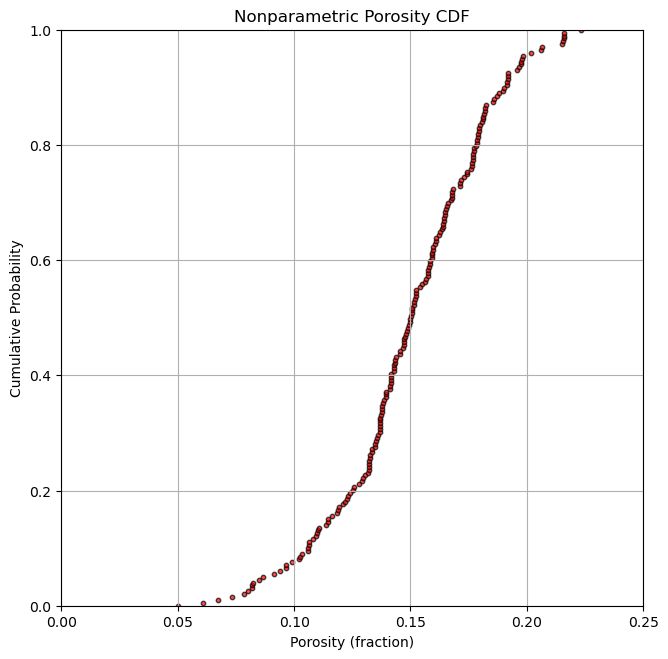

In [25]:
# sort the data:
por_sort = np.sort(por)

# calculate the cumulative probabilities assuming known tails
p = np.arange(len(por)) / (len(por) - 1)

# plot the cumulative probabilities vs. the sorted porosity values
plt.subplot(122)
plt.scatter(por_sort, p, c = 'red', edgecolors = 'black', s = 10, alpha = 0.7)
plt.xlabel('Porosity (fraction)'); plt.ylabel('Cumulative Probability'); plt.grid(); 
plt.title('Nonparametric Porosity CDF')
plt.ylim([0,1]); plt.xlim([0,0.25])
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.3)

#### Fit a Gaussian Distribution

Let's fit a Gaussian distribution

* we get fancy with Maximuum Likelihood Estimation (MLE) for the Gaussian parametric distribution fit mean and standard deviation

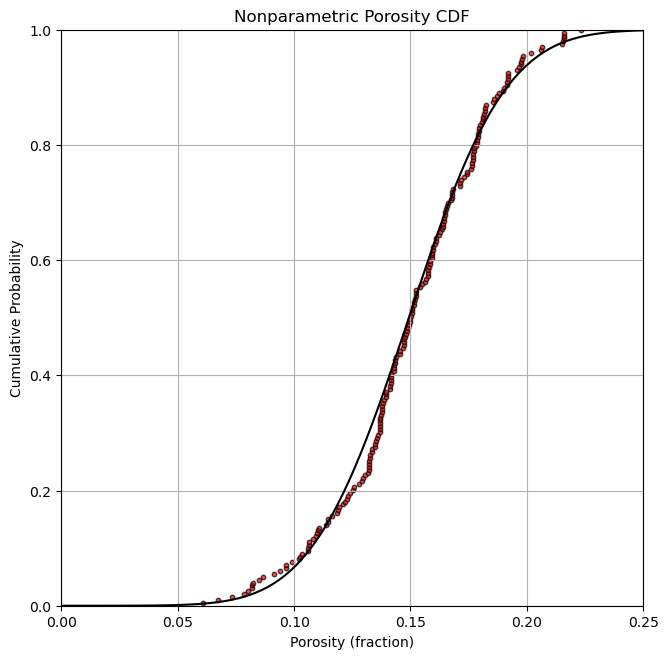

In [26]:
por_values = np.linspace(0.0,0.25,100) 
fit_mean, fit_stdev = norm.fit(por,loc = por_average, scale = por_std) # fit MLE of the distribution 
cumul_p = norm.cdf(por_values, loc = fit_mean, scale = fit_stdev)

# plot the cumulative probabilities vs. the sorted porosity values
plt.subplot(122)
plt.scatter(por_sort, p, c = 'red', edgecolors = 'black', s = 10, alpha = 0.7)
plt.plot(por_values,cumul_p, c = 'black')
plt.xlabel('Porosity (fraction)'); plt.ylabel('Cumulative Probability'); plt.grid(); 
plt.title('Nonparametric Porosity CDF')
plt.ylim([0,1]); plt.xlim([0,0.25])
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.3)

#### Comments

This was a basic demonstration of univariate statistics in Python. Much more can be done, I have other demonstrations for modeling workflows with GeostatsPy in the GitHub repository [GeostatsPy_Demos](https://github.com/GeostatsGuy/GeostatsPy_Demos/tree/main).

I hope this is helpful,

*Michael*
  
I hope this was helpful,

*Michael*

#### About the Author

<figure style="text-align: center;">
  <img src="_static/intro/michael_pyrcz_officeshot_jacket.jpg" style="display: block; margin: 0 auto; width: 70%;">
  <figcaption style="text-align: center;"> Professor Michael Pyrcz in his office on the 40 acres, campus of The University of Texas at Austin.
</figcaption>
</figure>

Michael Pyrcz is a professor in the [Cockrell School of Engineering](https://cockrell.utexas.edu/faculty-directory/alphabetical/p), and the [Jackson School of Geosciences](https://www.jsg.utexas.edu/researcher/michael_pyrcz/), at [The University of Texas at Austin](https://www.utexas.edu/), where he researches and teaches subsurface, spatial data analytics, geostatistics, and machine learning. Michael is also,

* the principal investigator of the [Energy Analytics](https://fri.cns.utexas.edu/energy-analytics) freshmen research initiative and a core faculty in the Machine Learn Laboratory in the College of Natural Sciences, The University of Texas at Austin

* an associate editor for [Computers and Geosciences](https://www.sciencedirect.com/journal/computers-and-geosciences/about/editorial-board), and a board member for [Mathematical Geosciences](https://link.springer.com/journal/11004/editorial-board), the International Association for Mathematical Geosciences. 

Michael has written over 70 [peer-reviewed publications](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en), a [Python package](https://pypi.org/project/geostatspy/) for spatial data analytics, co-authored a textbook on spatial data analytics, [Geostatistical Reservoir Modeling](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) and author of two recently released e-books, [Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) and [Applied Machine Learning in Python: a Hands-on Guide with Code](https://geostatsguy.github.io/MachineLearningDemos_Book/intro.html).

All of Michael’s university lectures are available on his [YouTube Channel](https://www.youtube.com/@GeostatsGuyLectures) with links to 100s of Python interactive dashboards and well-documented workflows in over 40 repositories on his [GitHub account](https://github.com/GeostatsGuy), to support any interested students and working professionals with evergreen content. To find out more about Michael’s work and shared educational resources visit his [Website](www.michaelpyrcz.com).

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PI is Professor John Foster)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Professor, Cockrell School of Engineering and The Jackson School of Geosciences, The University of Texas at Austin

More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)